# **ECS 171** Group Project

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

## **Reformatting**
***

In [3]:
_attr = {
    'class': {'e':'edible', 'p':'poisonous'},
    'cap-shape': {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'},
    'cap-surface': {'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'},
    'cap-color': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'gill-attachment': {'a':'attached', 'd':'descending', 'f':'free', 'n':'notched'},
    'gill-spacing': {'c':'close', 'w':'crowded', 'd':'distant'},
    'gill-size': {'b':'broad', 'n':'narrow'},
    'gill-color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray', 'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk-shape': {'e':'enlarging', 't':'tapering'},
    'stalk-root': {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 'z':'rhizomorphs', 'r':'rooted', '?':'missing'},
    'stalk-surface-above-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk-surface-below-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk-color-above-ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk-color-below-ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'veil-type': {'p':'partial', 'u':'universal'},
    'veil-color': {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'},
    'ring-number': {'n':'none', 'o':'one', 't':'two'},
    'ring-type': {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large', 'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'},
    'bruises': {'t':'bruises', 'f':'no'},
    'odor': {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent', 's':'spicy' },
    'spore-print-color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'},
    'population': {'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 'v':'several', 'y':'solitary'},
    'habitat': {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'}
    }

# Load dataset
df = pd.read_csv('./data/mushrooms.csv')
for col, attr in _attr.items():
    df[col] = df[col].replace(attr)

| Target Attribute | Values
|------------------|---------
| `class`          |`e`=edible, `p`=poisonous

| Cap Features  | Values
|---------------|--------
| `cap-shape`   |`b`=bell,    `c`=conical, `x`=convex,   `f`=flat,  `k`=knobbed, `s`=sunken
| `cap-surface` |`f`=fibrous, `g`=grooves, `y`=scaly,    `s`=smooth
| `cap-color`   |`n`=brown,   `b`=buff,    `c`=cinnamon, `g`=gray,  `r`=green,   `p`=pink, `u`=purple, `e`=red, `w`=white, `y`=yellow

| Gill Features     | Values
|-------------------|--------
| `gill-attachment` |`a`=attached, `d`= descending, `f`=free, `n`=notched
| `gill-spacing`    |`c`=close,    `w`= crowded,    `d`=distant
| `gill-size`       |`b`=broad,    `n`= narrow
| `gill-color`      |`k`=black,    `n`= brown,      `b`=buff, `h`=chocolate, `g`=gray, `r`=green, `o`=orange, `p`=pink, `u`=purple, `e`=red, `w`=white , `y`=yellow

| Stalk Features             | Values
|----------------------------|--------
| `stalk-shape`              |`e`=enlarging, `t`= tapering
| `stalk-root`               |`b`=bulbous,   `c`=club,  `u`=cup,      `e`=equal, `z`=rhizomorphs, `r`=rooted, `?`=missing
| `stalk-surface-above-ring` |`f`=fibrous,   `y`=scaly, `k`=silky,    `s`=smooth
| `stalk-surface-below-ring` |`f`=fibrous,   `y`=scaly, `k`=silky,    `s`=smooth
| `stalk-color-above-ring`   |`n`=brown,     `b`=buff,  `c`=cinnamon, `g`=gray,  `o`=orange, `p`=pink, `e`=red, `w`=white, `y`=yellow
| `stalk-color-below-ring`   |`n`=brown,     `b`=buff,  `c` cinnamon, `g`=gray,  `o`=orange, `p`=pink, `e`=red, `w`=white, `y`=yellow


| Veil Features | Values
|-------------- |--------
| `veil-type`   |`p`=partial,  `u`=universal
| `veil-color`  |`n`=brown,    `o`=orange,     `w`=white,   `y`=yellow
| `ring-number` |`n`=none,     `o`=one,        `t`=two
| `ring-type`   |`c`=cobwebby, `e`=evanescent, `f`=flaring, `l`=large , `n`=none, `p`=pendant, `s`= heathing, `z`=zone



| Miscellaneous Features | Values
|------------------------|--------
| `bruises`              |`t`=yes,      `f`=no
| `odor`                 |`a`=almond,   `l`=anise,     `c`=creosote, `y`=fishy,     `f`=foul,    `m`=musty,   `n`=none,   `p`=pungent, `s`=spicy
| `spore-print-color`    |`k`=black,    `n`=brown,     `b`=buff,     `h`=chocolate, `r`=green,   `o`=orange,  `u`=purple, `w`=white ,  `y`=yellow 
| `population`           |`a`=abundant, `c`=clustered, `n`=numerous, `s`=scattered, `v`=several, `y`=solitary
| `habitat`              |`g`=grasses,  `l`=leaves,    `m`=meadows,  `p`=paths,     `u`=urban,   `w`=waste,   `d`=woods

In [3]:
# Count rows and columns
print('Total rows:', df.shape[0])
print('Total columns:', df.shape[1])
df.head() # View head

Total rows: 8124
Total columns: 23


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## **Exploratory Data Analysis**
***

#### Visualization

Poisonous mushrooms: 3916 (48.2%)
Edible mushrooms: 4208 (51.8%)


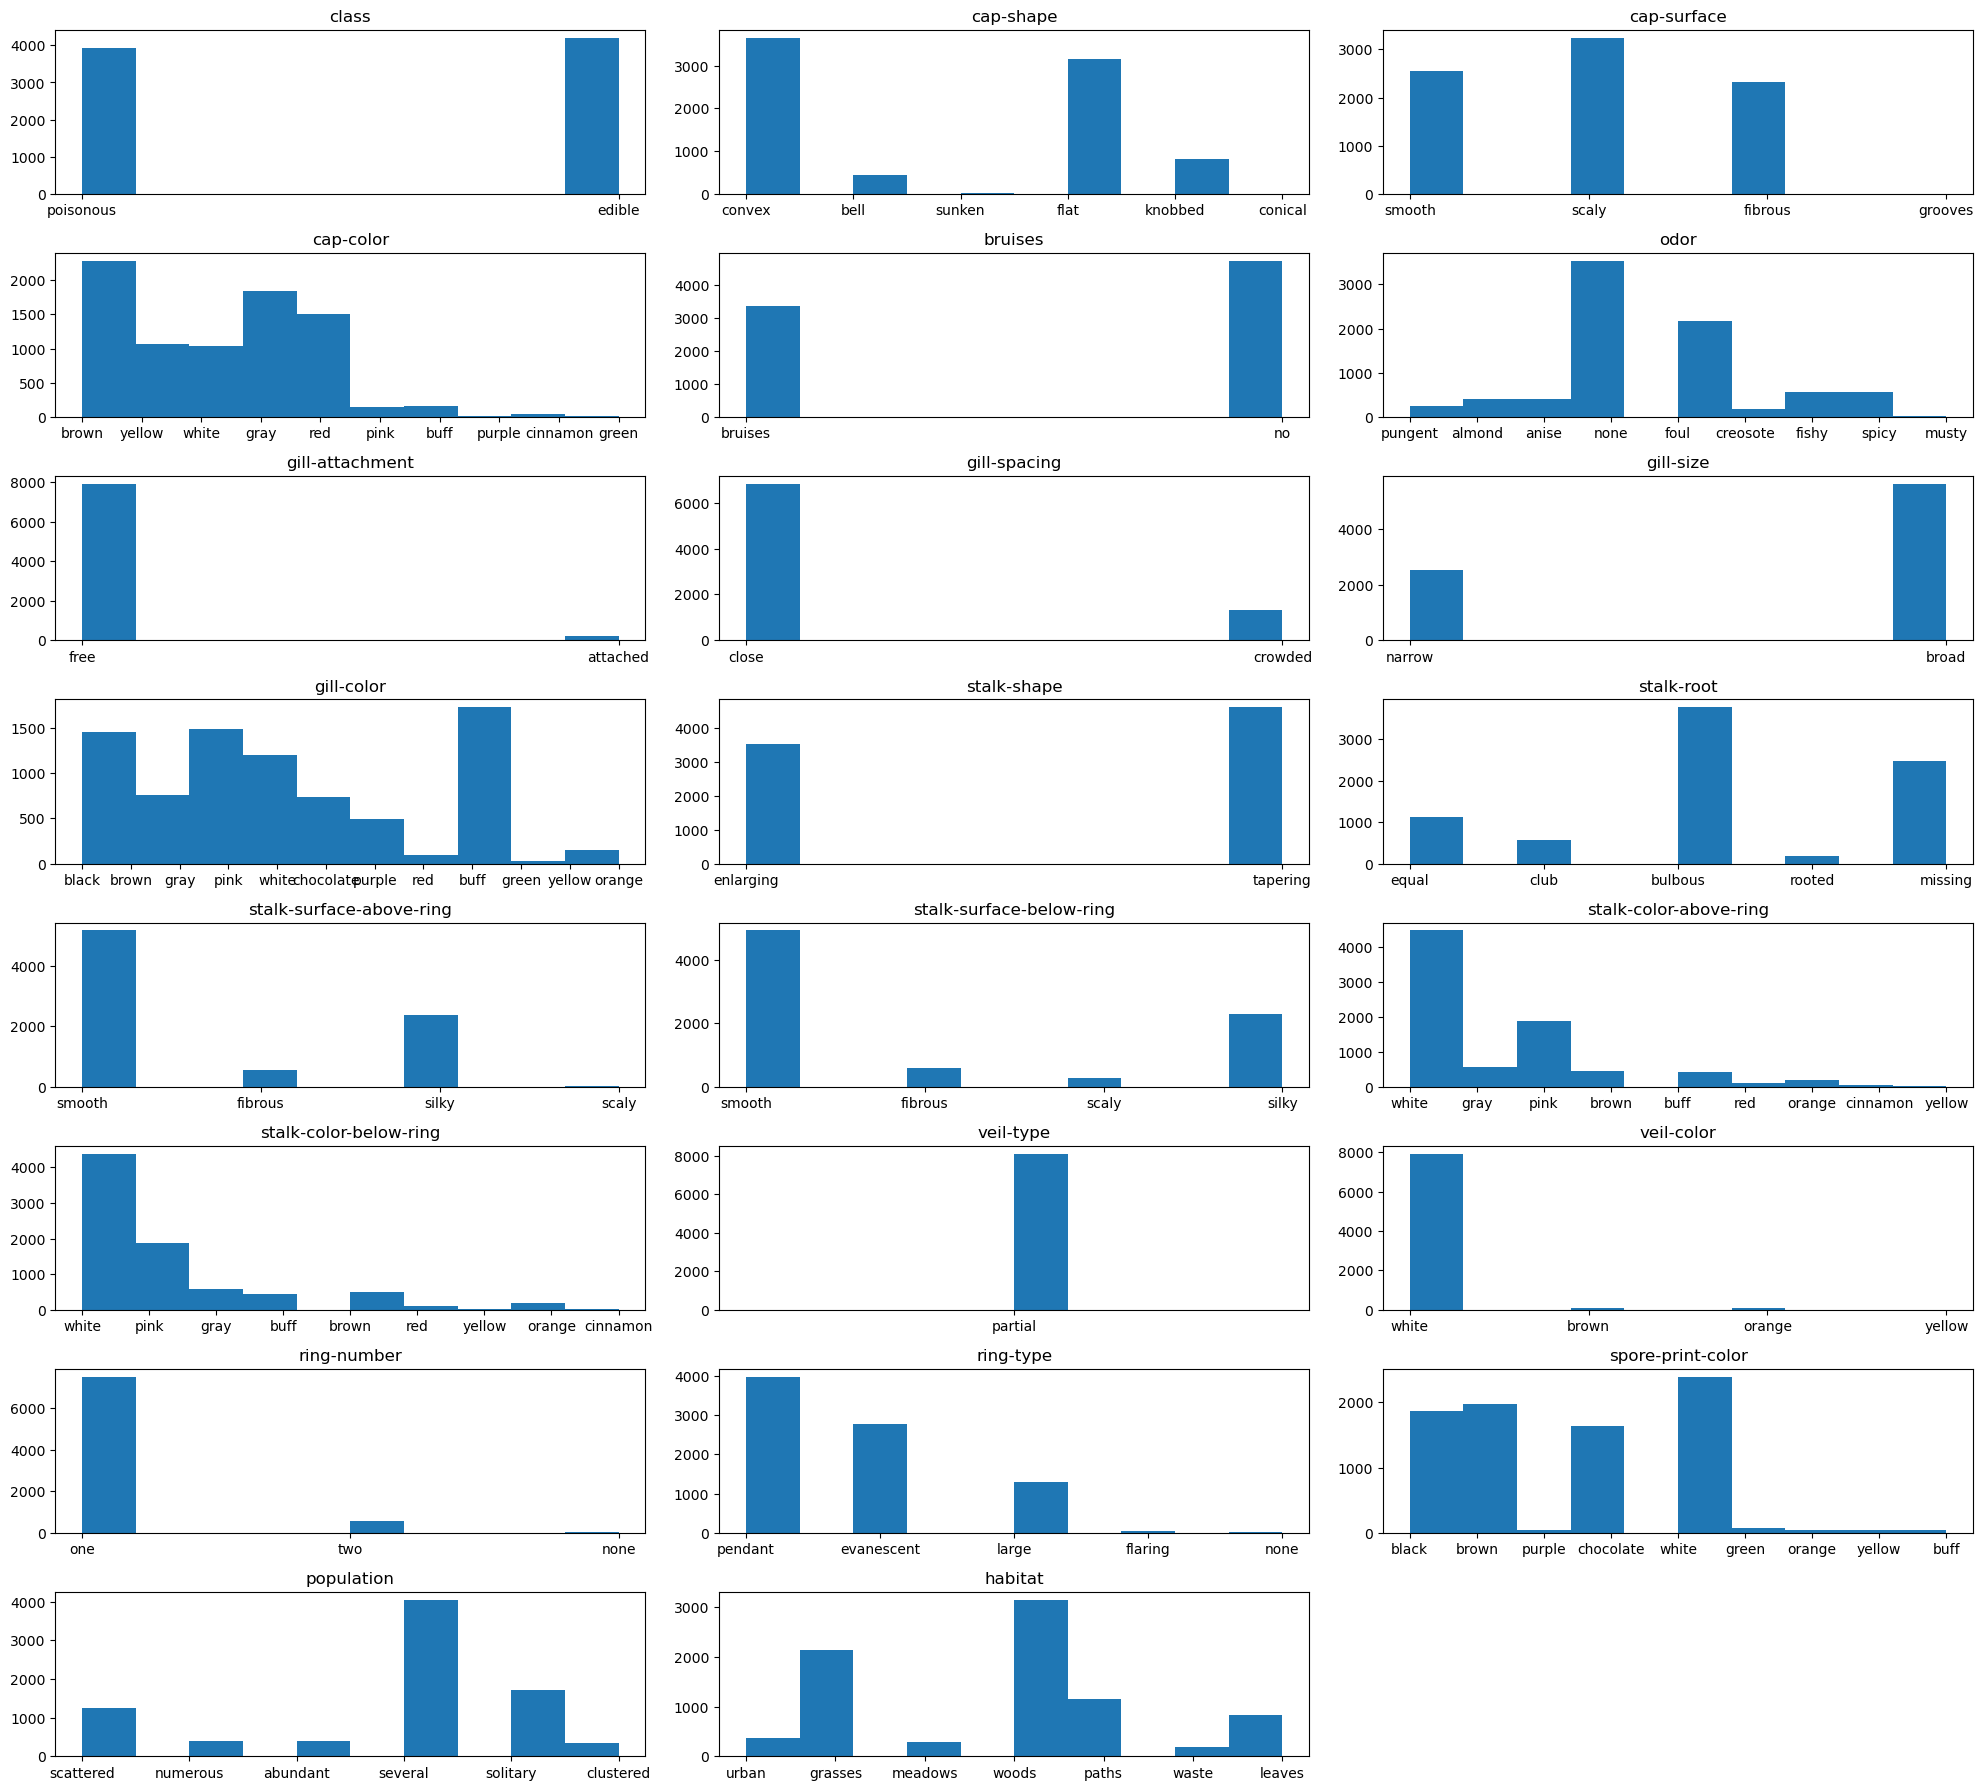

In [4]:
# Convert columns to categorical
df = df.astype('category')

# Show target count
df_target = df['class']
p = df[df=='poisonous'].count().sum()
e = df[df=='edible'].count().sum()
total = df_target.value_counts().sum()
print("Poisonous mushrooms: {} ({:.4}%)".format(p, (p/total) * 100))
print("Edible mushrooms: {} ({:.4}%)".format(e, (e/total) * 100))

# Plot histograms of features
plt.figure(figsize=(20, 20))
for n, i in enumerate(df.columns, 1):
    plt.subplot(9, 3, n)    
    plt.title(f'{i}')
    plt.hist(df[i])
plt.tight_layout()
plt.show()

C:\Users\noora\AppData\Local\Temp\ipykernel_20628\1564507705.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


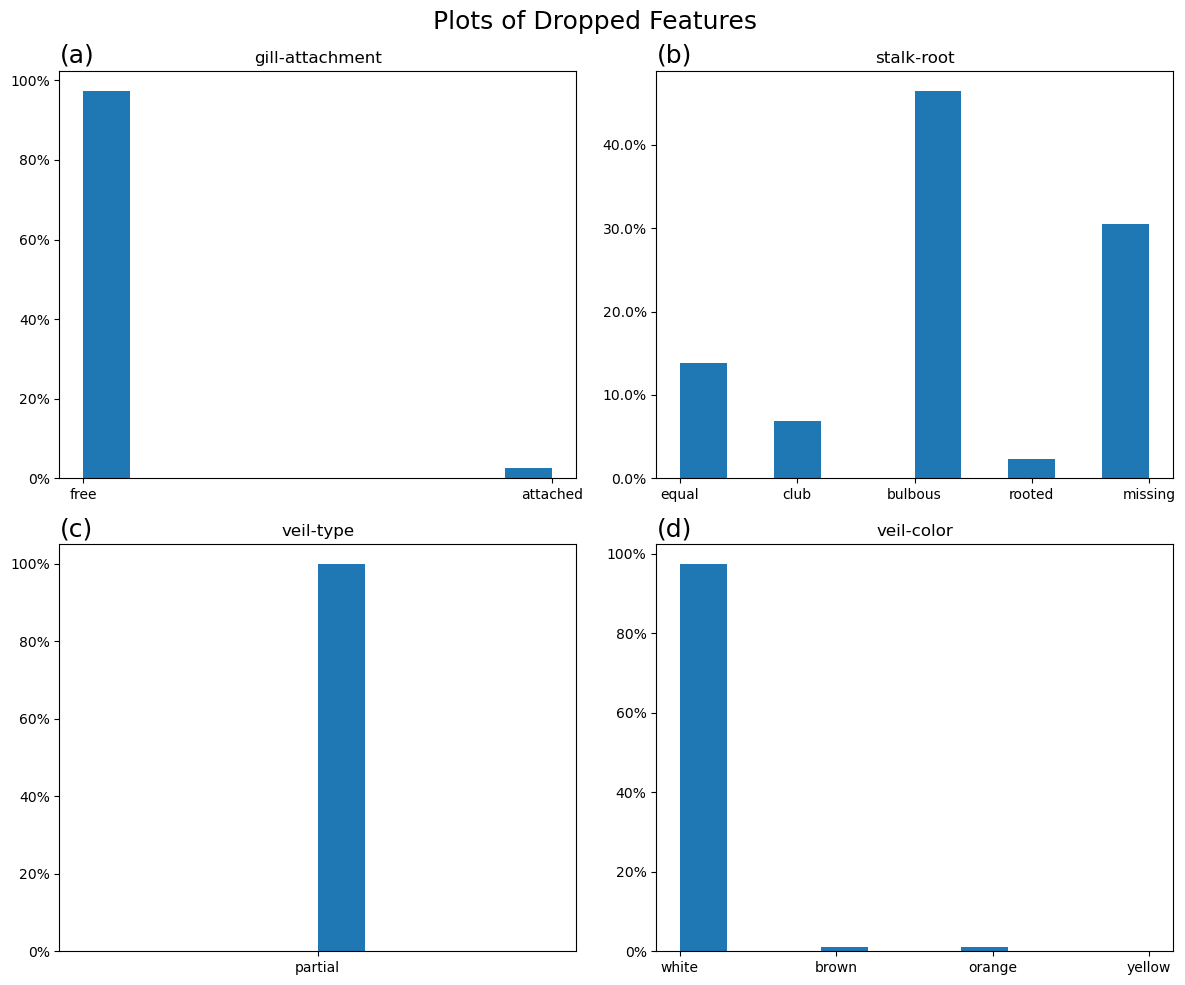

In [84]:
# Highlighting the plots of the features we'll drop 
# to showcase as figures in our plot
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(12, 10), layout='constrained')
plt.suptitle('Plots of Dropped Features', fontsize='18')
features_to_plot = ['gill-attachment', 'stalk-root', 'veil-type', 'veil-color']
annotations = ['(a)', '(b)', '(c)', '(d)']


for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)    
    plt.title(feature)
    plt.hist(df[feature], weights=np.ones(len(df[feature])) / len(df[feature]))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title(annotations[i-1], loc='left', fontsize='18')

plt.tight_layout()
plt.show()

#### Feature Engineering

In [5]:
# According to agaricus-lepiota.names, missing values were denoted with '?'
# These instances were replaced with 'missing' during reformatting
print(df[df == 'missing'].count()) # Search for '?' in dataset
print("Total values denoted as null/NaN: ", df.isnull().sum().sum())
print("Total values denoted as '?': ", df[df == 'missing'].count().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64
Total values denoted as null/NaN:  0
Total values denoted as '?':  2480


Although the dataset reports 0 null/NaN values, the `agaricus-lepiota.names` file notes, "Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute #11," \
where attribute #11 is `stalk-root`, confirmed above as we search for all the `"missing"` values in the data frame.

In [85]:
# Column breakdown
for col in df:
    pct = df[col].value_counts() / df.shape[0] * 100
    # print(round(pct, 2), "\n")

| Attribute          | Observations
|--------------------|----------------------
| `gill-attachment`  | This attribute is represented with two distinct values, where **97.42%** of the mushrooms have **free (`f`)** gills and **2.58%** have **attached (`a`)** gills. With a large majority of the samples having free gills, there is not enough unique information that this attribute can provide. Thus, it is eliminated from the dataset.
|`stalk-root`        | According to agaricus-lepiota.names, this feature contains **2480** missing attribute values in the data. Since this aspect of the dataset is incomplete, it is removed from the dataset.
|`veil-type`         | **100%** of the mushrooms are partial (`p`) veil types. Since this attribute only consists of one unique value to observe, it is not a detailed enough category to train our model with. This is also dropped from the dataset.
|`veil-color`        | **97.54%** of the mushrooms have **brown (`n`)** veil colors while **2.46%** make up the others. With little variation in this feature, we can leave it out of the dataset.

The remaining features are observed to be sufficiently varied and distributed in a way that will effectively train our model.

In [7]:
df.drop(['gill-attachment'], axis=1, inplace=True)
df.drop(['stalk-root'], axis=1, inplace=True)
df.drop(['veil-type'], axis=1, inplace=True)
df.drop(['veil-color'], axis=1, inplace=True)

## **Data Modeling**
***

#### Encoding

In [8]:
from sklearn.model_selection import train_test_split as split
from sklearn import preprocessing as pre

X, y = df.iloc[:, 1:], df.iloc[:, 0] 
X_train, X_test, y_train, y_test = split(X, y, random_state=42)

# Label encoding
label   = pre.LabelEncoder()
y_train = label.fit_transform(y_train)
y_test  = label.fit_transform(y_test)

# One-hot encoding
hot = pre.OneHotEncoder()
hot.fit(X_train)
X_train = hot.transform(X_train).toarray()
X_test  = hot.transform(X_test).toarray()

#### Testing

In [9]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier as KNeighbors
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.ensemble import GradientBoostingClassifier as GradientBoost
from sklearn.dummy import DummyClassifier as Dummy
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.svm import SVC

models = [
    LogisticRegression(),
    Perceptron(),
    GaussianNB(),
    MultinomialNB(),
    CategoricalNB(),
    KNeighbors(),
    RandomForest(),
    GradientBoost(),
    Dummy(),
    DecisionTree(),
    SVC(probability=True)
    ]

metrics = pd.DataFrame(columns=['Model', 'Cross value (average)', 'Accuracy (train)', 'Accuracy (test)', 'Recall (train)', 'Recall (test)', 'Precision (train)', 'Precision (test)', 'f1 (train)', 'f1 (test)', 'Saved Model'])

In [10]:
from sklearn.model_selection import cross_val_score as cross
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

def acc(truth, pred):  return accuracy_score(truth, pred)
def rec(truth, pred):  return recall_score(truth, pred, zero_division=1)
def prec(truth, pred): return precision_score(truth, pred, zero_division=1)
def f1(truth, pred):   return f1_score(truth, pred, zero_division=1)

for i, model in enumerate(models, 0):
    cross_val = cross(estimator=model, X=X_train, y=y_train, cv=10).mean()

    # Fit model on train set 
    model.fit(X_train, y_train)

    # Generate predictions on train/test sets
    y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)

    # Compute model metrics
    cpy, model = model, str(model).split('(', 1)[0]
    acc_train,  acc_test  = acc(y_train, y_pred_train),  acc(y_test, y_pred_test)
    rec_train,  rec_test  = rec(y_train, y_pred_train),  rec(y_test, y_pred_test)
    prec_train, prec_test = prec(y_train, y_pred_train), prec(y_test, y_pred_test)
    f1_train,   f1_test   = f1(y_train, y_pred_train),   f1(y_test, y_pred_test)

    # Store metrics for current model
    metrics.loc[i] = [model, cross_val, acc_train, acc_test, rec_train, rec_test, prec_train, prec_test, f1_train, f1_test, cpy]

#### Evaluation

In [11]:
metrics.sort_values(by=['Accuracy (test)', 'Cross value (average)'], ascending=False)

,Model,Cross value (average),Accuracy (train),Accuracy (test),Recall (train),Recall (test),Precision (train),Precision (test),f1 (train),f1 (test),Saved Model
1,Perceptron,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Perceptron()
5,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,KNeighborsClassifier()
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"(DecisionTreeClassifier(max_features='sqrt', r..."
7,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,([DecisionTreeRegressor(criterion='friedman_ms...
9,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,DecisionTreeClassifier()
10,SVC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,SVC(probability=True)
0,LogisticRegression,0.999508,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,LogisticRegression()
2,GaussianNB,0.991792,0.991466,0.985229,0.998974,1.000000,0.983507,0.970617,0.991180,0.985089,GaussianNB()
3,MultinomialNB,0.958149,0.959954,0.955687,0.922393,0.914228,0.993738,0.994512,0.956738,0.952681,MultinomialNB()
4,CategoricalNB,0.946002,0.947152,0.943870,0.903590,0.896065,0.985091,0.987764,0.942582,0.939683,CategoricalNB()


With several models performing 100% on every metric, there are a handful to choose from.
For this project, we will move forward with Random Forest.

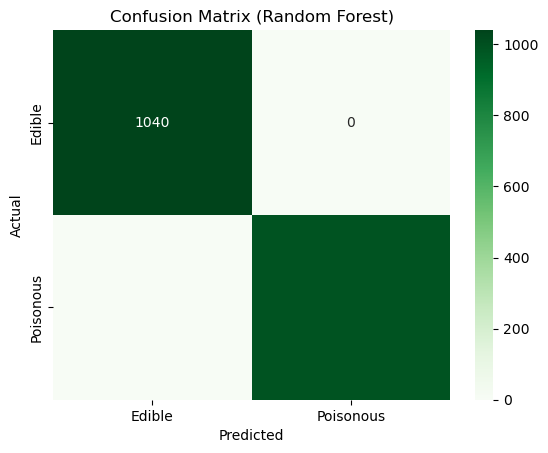

In [12]:
from sklearn.metrics import confusion_matrix as conf

best_model = metrics.loc[metrics['Model'] == 'RandomForestClassifier']['Saved Model'].values[0]
sns.heatmap(conf(y_test, best_model.predict(X_test)), annot=True, fmt='.0f', cmap='Greens',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Predicted"), plt.ylabel("Actual")
plt.title('Confusion Matrix (Random Forest)')
plt.show()